In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def getMetric(res_df, res_, m):
    m_score = pd.DataFrame(None, index=res_, columns=[i for i in range(res_df[0].shape[0])], 
                           dtype=str)
    for i,df in enumerate(res_df):
        sol = res_[i]
        m_score.loc[sol,:] = df.loc[:,m]
    return m_score

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html

# Load results

Locate and loas NN training metrics results.

In [3]:
res_dir = './results/'
for root, dirs, files in os.walk(res_dir):
    res_ = [f.removesuffix('.csv') for f in files] # file prefixes 
    res_path = [os.path.join(res_dir,r) for r in files] # file paths
    break

In [4]:
# short name version of solutions
res_short = ['fcNN', 'reactome']
for r in res_[2:]:
    res_short.append('_'.join(r.split('_')[:2]))

In [5]:
res_short

['fcNN',
 'reactome',
 'ICA_rna',
 'KMeans_g2v',
 'SOM_rna',
 'WGCNA_g2v',
 'HC_rna',
 'KMeans_rna',
 'GM_g2v',
 'PAM_rna',
 'SOM_g2v',
 'PAM_g2v',
 'HC_g2v',
 'FLAME_g2v',
 'FLAME_rna',
 'ICA_g2v',
 'GM_rna',
 'WGCNA_rna']

Create a data-frame with all results

In [6]:
res_df = [] # list of results for each solution
nLines = []
for i in range(len(res_)):
    df = pd.read_csv(res_path[i], index_col=0)
    nLines.append(df.shape[0])
    #solcol = pd.Series([res_[i]]*df.shape[0], name='Sol')
    res_df.append(df)
solcol = pd.Series(np.repeat(res_short, nLines, axis=0), name='Sol')
tmp = pd.concat(res_df, axis=0, ignore_index=True)
all_res = pd.concat([tmp,solcol], axis=1)
del tmp, nLines, df, solcol

In [7]:
all_res.head()

,AUC,Accuracy,Specificity,Sensitivity,Precision,Recall,F1,balanced_accuracy,cohen_kappa,MCC,Sol
0,0.882812,0.800,0.875000,0.6875,0.785714,0.6875,0.733333,0.781250,0.574468,0.577747,fcNN
1,0.757812,0.650,0.416667,1.0000,0.533333,1.0000,0.695652,0.708333,0.363636,0.471405,fcNN
2,0.778646,0.625,0.875000,0.2500,0.571429,0.2500,0.347826,0.562500,0.137931,0.161165,fcNN
3,0.776042,0.750,0.666667,0.8750,0.636364,0.8750,0.736842,0.770833,0.509804,0.533396,fcNN
4,0.776042,0.625,0.791667,0.3750,0.545455,0.3750,0.444444,0.583333,0.175824,0.182860,fcNN


In [8]:
all_res.tail()

,AUC,Accuracy,Specificity,Sensitivity,Precision,Recall,F1,balanced_accuracy,cohen_kappa,MCC,Sol
1795,0.825521,0.675,0.875000,0.3750,0.666667,0.3750,0.480000,0.625000,0.269663,0.293294,WGCNA_rna
1796,0.841146,0.700,0.916667,0.3750,0.750000,0.3750,0.500000,0.645833,0.318182,0.357217,WGCNA_rna
1797,0.822917,0.725,0.958333,0.3750,0.857143,0.3750,0.521739,0.666667,0.367816,0.429772,WGCNA_rna
1798,0.861979,0.700,0.875000,0.4375,0.700000,0.4375,0.538462,0.656250,0.333333,0.353553,WGCNA_rna
1799,0.880208,0.825,0.833333,0.8125,0.764706,0.8125,0.787879,0.822917,0.639175,0.640026,WGCNA_rna


In [9]:
# Dict with results for each metric
metrics = res_df[0].columns
metric_scores = {}
for m in metrics:
    metric_scores[m] = getMetric(res_df, res_short, m)

In [10]:
metric_scores['AUC']

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
fcNN,0.882812,0.757812,0.778646,0.776042,0.776042,0.825521,0.789062,0.885417,0.817708,0.807292,...,0.841146,0.848958,0.841146,0.786458,0.807292,0.84375,0.869792,0.888021,0.854167,0.835938
reactome,0.796875,0.65625,0.731771,0.739583,0.690104,0.882812,0.757812,0.898438,0.739583,0.84375,...,0.757812,0.802083,0.794271,0.739583,0.809896,0.815104,0.822917,0.755208,0.755208,0.830729
ICA_rna,0.833333,0.6875,0.71875,0.695312,0.765625,0.833333,0.710938,0.869792,0.817708,0.848958,...,0.739583,0.835938,0.799479,0.713542,0.802083,0.789062,0.778646,0.760417,0.802083,0.877604
KMeans_g2v,0.893229,0.674479,0.791667,0.726562,0.760417,0.921875,0.71875,0.893229,0.778646,0.872396,...,0.794271,0.864583,0.856771,0.770833,0.872396,0.877604,0.867188,0.825521,0.841146,0.809896
SOM_rna,0.875,0.669271,0.786458,0.731771,0.75,0.888021,0.742188,0.872396,0.815104,0.880208,...,0.783854,0.848958,0.84375,0.744792,0.833333,0.854167,0.848958,0.833333,0.825521,0.856771
WGCNA_g2v,0.885417,0.661458,0.796875,0.765625,0.760417,0.901042,0.716146,0.885417,0.822917,0.875,...,0.755208,0.851562,0.872396,0.747396,0.838542,0.856771,0.861979,0.841146,0.848958,0.835938
HC_rna,0.856771,0.669271,0.773438,0.742188,0.739583,0.903646,0.768229,0.885417,0.763021,0.888021,...,0.807292,0.848958,0.848958,0.734375,0.822917,0.841146,0.841146,0.809896,0.859375,0.838542
KMeans_rna,0.854167,0.690104,0.789062,0.726562,0.783854,0.872396,0.747396,0.890625,0.820312,0.890625,...,0.791667,0.851562,0.872396,0.744792,0.804688,0.851562,0.835938,0.833333,0.846354,0.880208
GM_g2v,0.869792,0.692708,0.796875,0.723958,0.736979,0.888021,0.729167,0.854167,0.799479,0.888021,...,0.791667,0.838542,0.84375,0.757812,0.825521,0.854167,0.877604,0.783854,0.8125,0.877604
PAM_rna,0.861979,0.661458,0.773438,0.776042,0.776042,0.90625,0.755208,0.888021,0.799479,0.872396,...,0.776042,0.830729,0.830729,0.776042,0.802083,0.833333,0.854167,0.84375,0.867188,0.851562


In [14]:
g2v = pd.read_csv('/home/ldap/ipellet/Documents/data/gene2vec_dim_200_iter_9.csv', index_col=0)
rna = pd.read_csv('/home/ldap/ipellet/Documents/data/DataRnaseq_Transposed.csv', index_col=0)

In [15]:
val_split = 0.1
test_split = 0.2
train_slpit = 1-val_split-test_split

#lenData = {'rna':rna.shape[0], 'g2v':g2v.shape[0]}
DataSets = ['rna','g2v']
#n_train_ds = {ds:lenData[ds]*train_slpit for ds in DataSets}
#n_test_ds = {ds:lenData[ds]*test_split for ds in DataSets}

In [16]:
DataSets

['rna', 'g2v']

# Metrics definitions

## Accuracy

$$Accuracy = \frac{\# Correct Predictions}{Total \# Predictions}$$

Works well with equal number of sample in each class. If unbalanced classes number in the data, the accuracy is biased toward better accuracy.

## Balanced Accuracy

$$BalancedAccuracy = \frac{1}{2}\left(\frac{TP}{TP+FN}+\frac{TN}{TN+FP}\right)$$

## Specificity : True Negative Rate

Proportion of negative data points correctly considered as negative, w/r to all negative data points.

$$True Negative Rate = \frac{True Negative}{False Positive + True Negative},\quad TNR\in[0,1]$$

## Sensitivity : True Positive Rate

Proportion of positive data points correctly considered as positive, w/r to all positive data points.

$$True Positive Rate = \frac{True Positive}{False Negative + True Positive},\quad TPR \in [0,1]$$

## False Positive Rate

Proportion of negative data points mistakenly considered as positive, w/r to all negative data points.

$$False Positive Rate = \frac{False Positive}{True Negative + False Positive},\quad FPR\in[0,1]$$

## AUC

Area Under Curve of a classifier is equal to the **probability** that the classifier will rank a **randomly chosen positive** example **higher** than a **randomly chosen negative** example.

ROC : curve $TPR = f(FPR)$

AUC : area under the ROC, $AUC \in [0,1]$. The greater the value, the better is the performance of the model.

## Precision

Ability of the model not to label as positive a negative sample.
$$Precision = \frac{TP}{TP+FP}$$

## Recall

Ability of the model to find all the positive samples.
$$Recall = \frac{TP}{TP+FN}$$

## F1-score

Harmonic Mean between precision and recall. Best at $1$, worst at $0$.
$$F1 = 2\times\frac{Precision \times Recall}{Precision + Recall} = 2\times\frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}$$

## Cohen's kappa
Compare labeling by different human annotators, not a classifier VS a ground truth.

$\kappa \in [-1,1]$, $\kappa > 0.8$ are generally considered good agreement, $\kappa \leq 0$ means no agreement.

$$\kappa = \frac{2\times(TP \times TN - FP \times FN)}{(TP+FP)(FP+TN) + (TP+FN)(FN+TN)}$$

## MCC : Matthew's Correlation Coefficient

Matthew's Correlation Coefficient is a measure of the quality of binary classification. Can be used even if the classes are of very different sizes. Correlation coefficient $\in [-1,1]$. 
- $+1$ : perfect prediction
- $0$ : random prediction
- $-1$ : inverse prediction

$$MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

## Sources

- https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://en.wikipedia.org/wiki/Cohen%27s_kappa

# Results visualisation

In [17]:
metrics_ = res_df[0].columns
nMetrics = len(metrics_)

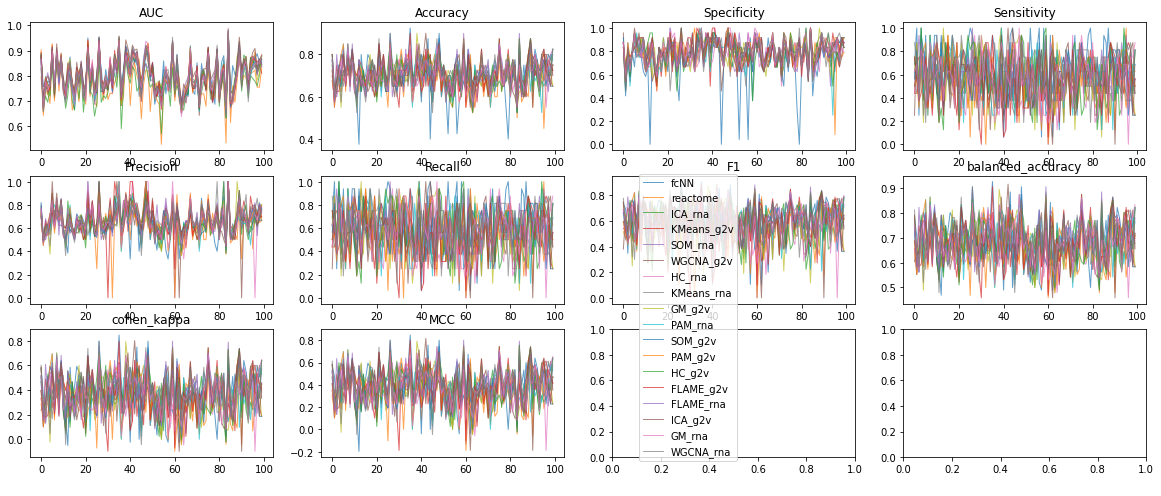

In [29]:
plt.rcParams['figure.figsize'] = (20,8)
nCol = 4
fig, axs = plt.subplots(math.ceil(nMetrics/nCol), nCol)
for i,m in enumerate(metrics):
    ax = axs[i//nCol,i%nCol]
    for i in range(len(res_df)):
        ax.plot(res_df[i].loc[:,m], alpha=0.7, linewidth=1)
    ax.set_title(m)
fig.legend(res_short, loc=(0.55,0.07));

In [19]:
g2v_size = g2v.shape[0]

In [20]:
model_1 = AUC_summary.index[0]
model_2 = AUC_summary.index[-1]

model_1_scores = AUC_scores.loc[model_1,:].values  # scores of the best model
model_2_scores = AUC_scores.loc[model_2,:].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
#n_train = len(list(cv.split(X, y))[0][0])
#n_test = len(list(cv.split(X, y))[0][1])
val_split = 0.1
test_split = 0.2
train_slpit = 1-val_split-test_split
n_train = g2v_size*train_slpit
n_test = g2v_size*test_split

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

NameError: name 'AUC_summary' is not defined

In [21]:
# initialize random variable
t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)

NameError: name 't' is not defined

In [22]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(x, t_post.pdf(x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(x, t_post.pdf(x), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution")
plt.show()

NameError: name 't_post' is not defined

In [23]:
better_prob = 1 - t_post.cdf(0)

print(
    f"Probability of {model_1} being more accurate than "
    f"{model_2}: {better_prob:.3f}"
)
print(
    f"Probability of {model_2} being more accurate than "
    f"{model_1}: {1 - better_prob:.3f}"
)

NameError: name 't_post' is not defined

In [30]:
ordered_models = ['fcNN', 'ICA_g2v', 'PAM_rna', 'HC_g2v', 'SOM_rna', 'WGCNA_rna',
       'KMeans_rna', 'HC_rna', 'SOM_g2v', 'PAM_g2v', 'GM_g2v', 'FLAME_rna',
       'KMeans_g2v', 'GM_rna', 'FLAME_g2v', 'WGCNA_g2v', 'ICA_rna',
       'reactome']

Plot and save boxplots for each metric

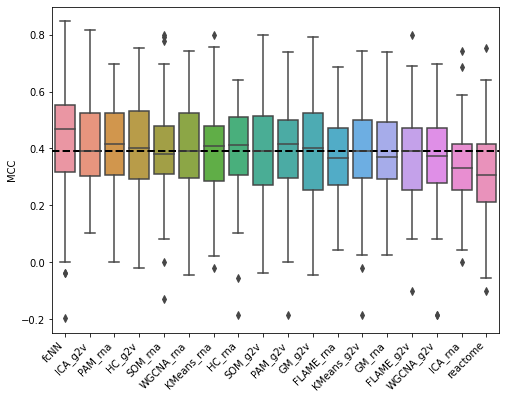

In [32]:
plt.rcParams['figure.figsize'] = (8,6)
for i,m in enumerate(metrics):    
    plt.clf()
    g = sns.boxplot( x=all_res["Sol"], y=all_res[m], order=ordered_models)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
    med = np.median(all_res[m])
    plt.hlines(med, ls='--', xmin=g.get_xlim()[0], xmax=g.get_xlim()[1], color = '0', lw=2)
    plt.xlabel("Sol", visible=False)
    #if i//nCol != nrow-1:
    #    plt.setp(ax.get_xticklabels(), visible=False)
    plt.savefig('/home/ldap/ipellet/Documents/img/NN_'+str(m)+'_boxplot.png', transparent=True, bbox_inches='tight')